In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
path = kagglehub.dataset_download("taqiyyaghazi/emotion-speech-features-for-speech-recognition")
print("Path to dataset files:", path)


100%|██████████| 20.4k/20.4k [00:00<00:00, 29.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/taqiyyaghazi/emotion-speech-features-for-speech-recognition/versions/1


In [3]:
import os

print("Dataset directory:", path)
print("Files in the dataset directory:", os.listdir(path))


Dataset directory: /root/.cache/kagglehub/datasets/taqiyyaghazi/emotion-speech-features-for-speech-recognition/versions/1
Files in the dataset directory: ['emotion_speech_audio_features.csv']


In [4]:
# Adjust the filename if necessary. Here we assume the CSV file is named 'emotion_speech_features.csv'.
csv_file = os.path.join(path, "emotion_speech_audio_features.csv")
df = pd.read_csv(csv_file)

In [5]:
print(df.columns)
# Likely prints: ['Chromagram', 'zcr', 'rmse', 'spectral_centroid', 'mfcc', 'label']


Index(['chromagram', 'zcr', 'rmse', 'spectral_centroid', 'mfcc', 'label'], dtype='object')


In [6]:
print("Target distribution:\n", df['label'].value_counts())


Target distribution:
 label
angry    200
happy    200
sad      200
Name: count, dtype: int64


In [7]:
print("Columns:", df.columns)
print(df.head())
# Replace 'emotion' with 'label' to access the correct target column
print("Target distribution:\n", df['label'].value_counts())

Columns: Index(['chromagram', 'zcr', 'rmse', 'spectral_centroid', 'mfcc', 'label'], dtype='object')
   chromagram       zcr      rmse  spectral_centroid       mfcc  label
0    0.299939  0.084582  0.041594        2029.668861 -20.490479  angry
1    0.288370  0.093827  0.022697        2022.437269 -21.925642  angry
2    0.286944  0.135844  0.029984        2767.091497 -21.901493  angry
3    0.289866  0.106571  0.043186        2336.967328 -20.616737  angry
4    0.249464  0.081463  0.030613        2183.718272 -21.014524  angry
Target distribution:
 label
angry    200
happy    200
sad      200
Name: count, dtype: int64


In [8]:
le = LabelEncoder()
df['emotion_encoded'] = le.fit_transform(df['label']) # Changed 'emotion' to 'label'
print("Encoded classes:", le.classes_)

Encoded classes: ['angry' 'happy' 'sad']


In [9]:
# Here we assume all columns except 'emotion' and 'emotion_encoded' are features.
feature_cols = [col for col in df.columns if col not in ['emotion', 'emotion_encoded']]
X = df[feature_cols]
y = df['emotion_encoded']

In [10]:
# Here we assume all columns except 'emotion', 'emotion_encoded', and 'label' are features.
feature_cols = [col for col in df.columns if col not in ['emotion', 'emotion_encoded', 'label']] # Added 'label' to the exclusion list
X = df[feature_cols]
y = df['emotion_encoded']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Importing StandardScaler

# ... (your previous code) ...

# Here we assume all columns except 'emotion', 'emotion_encoded', and 'label' are features.
feature_cols = [col for col in df.columns if col not in ['emotion', 'emotion_encoded', 'label']] # Added 'label' to the exclusion list
X = df[feature_cols]
y = df['emotion_encoded']

# Scale the features using StandardScaler
scaler = StandardScaler() # Creating a StandardScaler object
X_scaled = scaler.fit_transform(X) # Scaling the features and assigning to X_scaled

# We use stratified sampling to maintain the distribution of classes.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 480
Testing samples: 120


In [12]:
# We design a multi-layer perceptron (MLP) with dropout layers.
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 emotion classes: angry, happy, sad
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,203 (43.76 KB)

 Trainable params: 11,203 (43.76 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Use EarlyStopping to prevent overfitting.
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.3759 - loss: 1.0916 - val_accuracy: 0.8125 - val_loss: 0.8218
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8537 - loss: 0.7261 - val_accuracy: 0.8646 - val_loss: 0.4045
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8906 - loss: 0.3666 - val_accuracy: 0.8750 - val_loss: 0.2737
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9298 - loss: 0.2271 - val_accuracy: 0.8958 - val_loss: 0.2454
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9233 - loss: 0.1940 - val_accuracy: 0.8958 - val_loss: 0.2449
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9311 - loss: 0.1930 - val_accuracy: 0.9167 - val_loss: 0.1993
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9116 - loss: 0.1973 - val_accuracy: 0.9271 - val_loss: 0.1994
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9479 - loss: 0.1347 - val_accuracy: 0.9271 - 

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.9827 - loss: 0.0492
Test accuracy: 0.9750000238418579


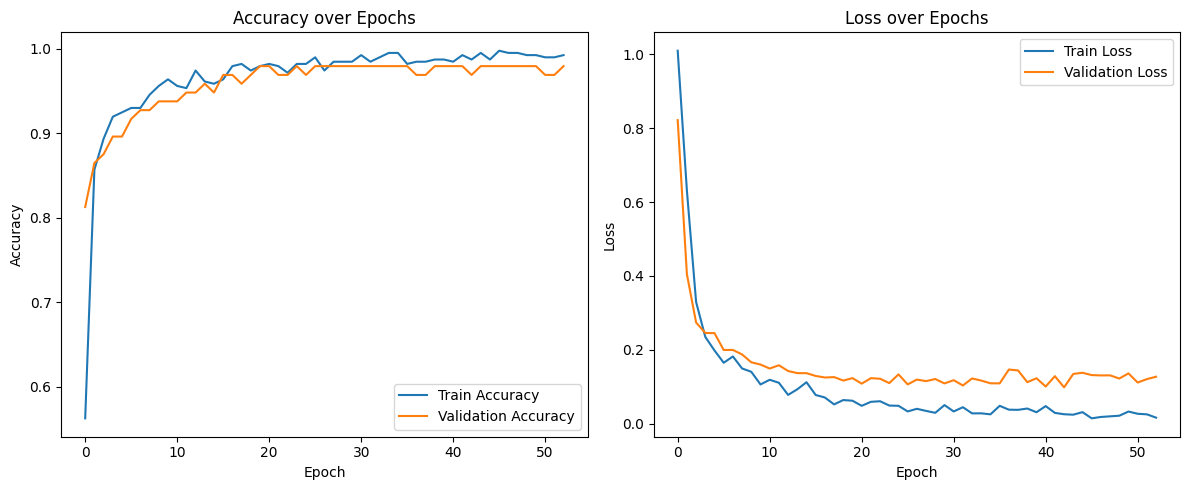

In [15]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
from google.colab import drive
drive.mount('/content/drive/drive')

Mounted at /content/drive/drive


In [21]:
import joblib

# Base path
base_path = "/content/drive/drive/MyDrive/Hackathon Models/4. Speech Emotion Recognition/"

# 1. Save Keras model
model.save(base_path + "speech_emotion_model.h5")

# 2. Save StandardScaler
joblib.dump(scaler, base_path + "scaler.pkl")

# 3. Save LabelEncoder
joblib.dump(le, base_path + "label_encoder.pkl")

['/content/drive/drive/MyDrive/Hackathon Models/4. Speech Emotion Recognition/label_encoder.pkl']